In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from skimage.feature import hog

In [4]:
dataset_path = "BoneFractureYolo8"


In [5]:
# Folder for images and labels
image_dir = os.path.join(dataset_path, 'train', 'images')
label_dir = os.path.join(dataset_path, 'train', 'labels')

# List of image and label files
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg')])
label_files = sorted([f for f in os.listdir(label_dir) if f.endswith('.txt')])


In [6]:
# Function to read labels from the label file
def get_label(file_path):
    with open(file_path, 'r') as file:
        label_content = file.readline().strip()
        if not label_content:  
            return None
        return int(label_content[0])  
    
# Initialize a list to store images and labels
images = []
labels = []
IMG_SIZE = 256

In [7]:
#Load images and labels
for image_file, label_file in zip(image_files, label_files):
    image_path = os.path.join(image_dir, image_file)
    label_path = os.path.join(label_dir, label_file)

    # Reading labels for images
    label = get_label(label_path)
    if label is None:  # Lewati jika label kosong
        continue

    # Reading and processing images
    image = cv2.imread(image_path)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    images.append(image)

    labels.append(label)

# onvert to NumPy arrays
images = np.array(images)
labels = np.array(labels)

In [8]:
# HOG feature extraction (Histogram of Oriented Gradients)
def extract_hog_features(images):
    hog_features = []
    for img in images:
        # Covnvert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        features, _ = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), block_norm='L2-Hys',
                          visualize=True)
        hog_features.append(features)
    return np.array(hog_features)

# HOG feature extraction from an image
hog_features = extract_hog_features(images)

# Split the dataset into training and validation"
X_train, X_val, y_train, y_val = train_test_split(hog_features, labels, test_size=0.2, stratify=labels)

# Model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82        61
           1       0.81      0.82      0.81        87
           2       0.82      0.65      0.73        57
           4       0.83      0.87      0.85        60
           5       0.82      0.94      0.87        63
           6       0.76      0.79      0.78        33

    accuracy                           0.81       361
   macro avg       0.81      0.81      0.81       361
weighted avg       0.81      0.81      0.81       361



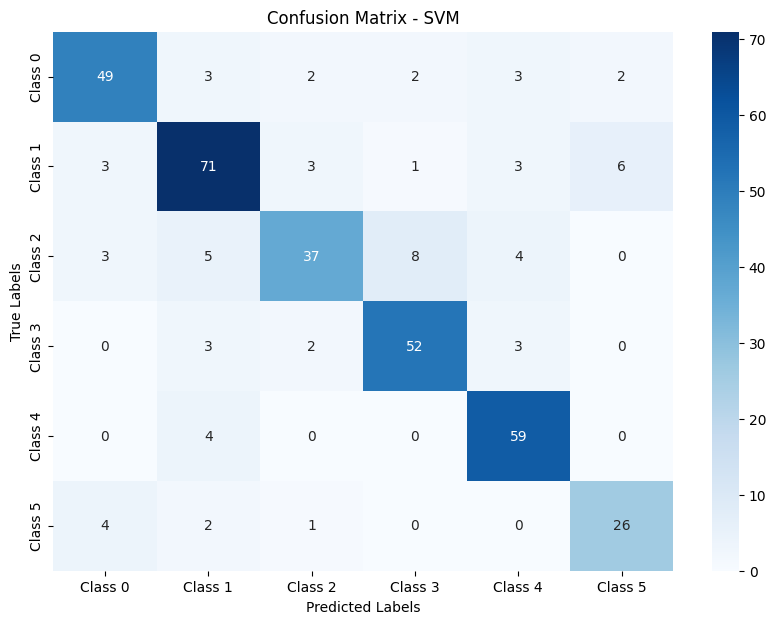

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71        61
           1       0.66      0.79      0.72        87
           2       0.78      0.44      0.56        57
           4       0.90      0.75      0.82        60
           5       0.69      0.94      0.79        63
           6       0.73      0.58      0.64        33

    accuracy                           0.72       361
   macro avg       0.74      0.70      0.71       361
weighted avg       0.74      0.72      0.72       361



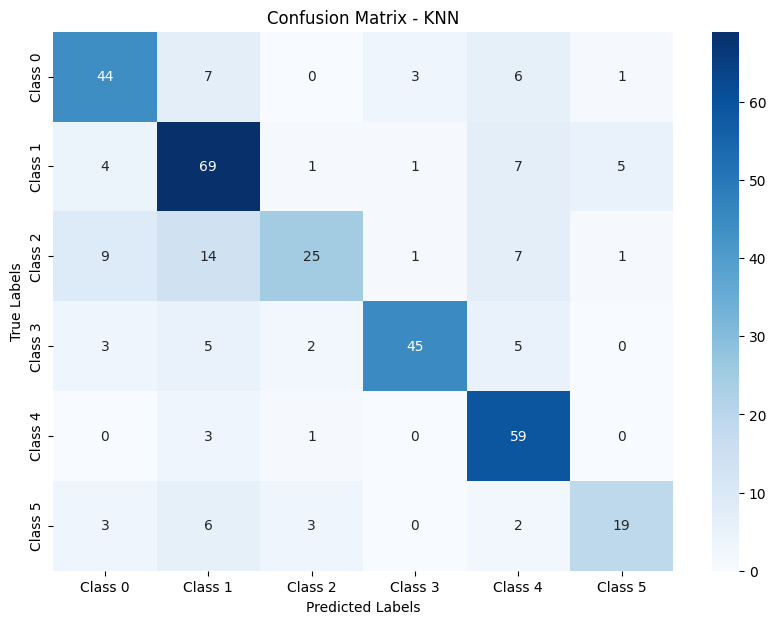

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# Train SVM Model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Eval SVM
svm_predictions = svm_model.predict(X_val)

# Print classification report
print("SVM Classification Report:")
print(classification_report(y_val, svm_predictions))

# Confusion Matrix
svm_conf_matrix = confusion_matrix(y_val, svm_predictions)

# Visualize Confusion Matrix for SVM
def plot_confusion_matrix(cm, class_names, title="Confusion Matrix"):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

# Define class labels (adjust class names if using one-hot encoding)
class_names = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5"]

# Plot confusion matrix for SVM
plot_confusion_matrix(svm_conf_matrix, class_names, title="Confusion Matrix - SVM")

# Train KNN Model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Evaluate KNN
knn_predictions = knn_model.predict(X_val)

# Print classification report
print("KNN Classification Report:")
print(classification_report(y_val, knn_predictions))

# Confusion Matrix
knn_conf_matrix = confusion_matrix(y_val, knn_predictions)

# Plot confusion matrix for KNN
plot_confusion_matrix(knn_conf_matrix, class_names, title="Confusion Matrix - KNN")


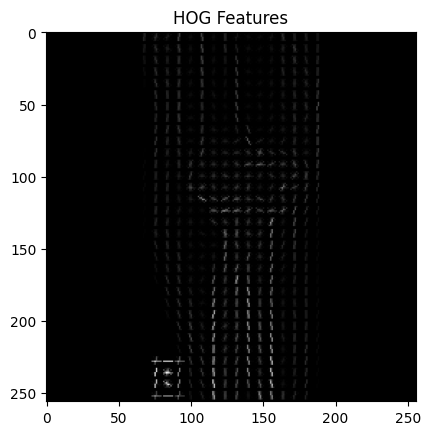

In [10]:
# Visualize HOG features (optional)
# Visualize HOG for one image
sample_image = images[0]
gray_sample = cv2.cvtColor(sample_image, cv2.COLOR_BGR2GRAY)
features, hog_image = hog(gray_sample, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), block_norm='L2-Hys',
                          visualize=True)
plt.imshow(hog_image, cmap='gray')
plt.title("HOG Features")
plt.show()

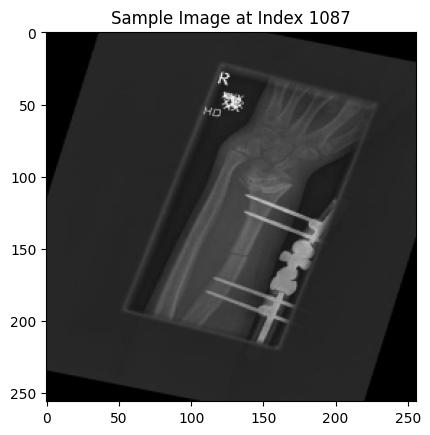

In [11]:
# Ensure the index used is valid
index_to_visualize = 1087
if index_to_visualize < len(images):
    sample_image = images[index_to_visualize]
    plt.imshow(sample_image, cmap='gray')
    plt.title(f"Sample Image at Index {index_to_visualize}")
    plt.show()
else:
    print(f"Index {index_to_visualize} is out of bounds for dataset size {len(images)}.")


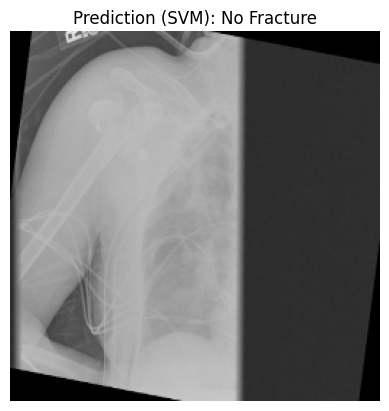

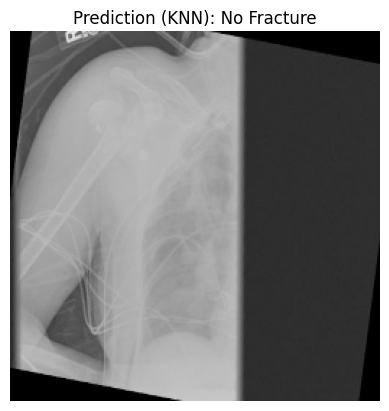

In [12]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Assuming X_train, X_val, y_train, and y_val are already defined

# Ensure feature dimensions match the model's expectation
def preprocess_features(X, target_shape):
    return np.array([cv2.resize(x, target_shape).flatten() for x in X])

IMG_SIZE = (256, 256)  # Define a fixed image size

X_train = preprocess_features(X_train, IMG_SIZE)
X_val = preprocess_features(X_val, IMG_SIZE)

# Train SVM Model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Train KNN Model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Bone Fracture Detection with Random Images
def predict_bone_fracture(image, model, model_name):
    # Preprocess the image
    image_resized = cv2.resize(image, IMG_SIZE)
    image_gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
    image_flattened = image_gray.flatten().reshape(1, -1)

    # Predict the label
    prediction = model.predict(image_flattened)[0]
    label = "Fracture" if prediction == 1 else "No Fracture"

    # Display the image and prediction
    plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction ({model_name}): {label}")
    plt.axis('off')
    plt.show()

# Randomly select an image from the dataset
random_index = np.random.randint(0, len(images))
random_image = images[random_index]

# Predict with SVM
predict_bone_fracture(random_image, svm_model, "SVM")

# Predict with KNN
predict_bone_fracture(random_image, knn_model, "KNN")


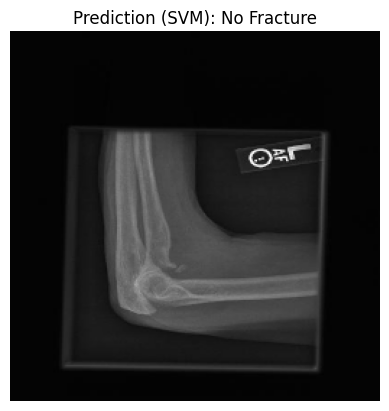

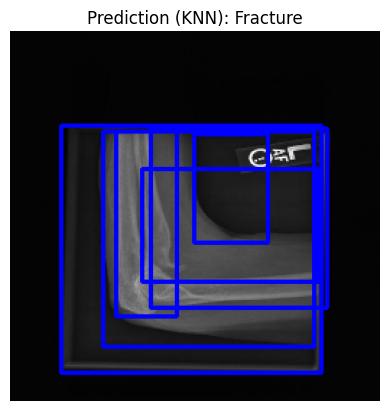

In [19]:

# Bone Fracture Detection with Highlighted Box
def predict_bone_fracture_with_box(image, model, model_name):
    # Preprocess the image
    image_resized = cv2.resize(image, IMG_SIZE)
    image_gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
    image_flattened = image_gray.flatten().reshape(1, -1)

    # Predict the label
    prediction = model.predict(image_flattened)[0]
    label = "Fracture" if prediction == 1 else "No Fracture"

    # Detect edges to localize potential fracture area
    edges = cv2.Canny(image_gray, threshold1=50, threshold2=150)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw bounding boxes around detected contours
    image_display = image_resized.copy()
    fracture_detected = False

    if label == "Fracture":
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            if w > 30 and h > 30:  # Filter out small boxes
                fracture_detected = True
                color = (255, 0, 0)  # Red box
                thickness = 2
                cv2.rectangle(image_display, (x, y), (x + w, y + h), color, thickness)

    # Adjust the final label based on contour analysis
    if not fracture_detected and label == "Fracture":
        label = "Uncertain"

    
    
    # Display the image and prediction
    plt.imshow(cv2.cvtColor(image_display, cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction ({model_name}): {label}")
    plt.axis('off')
    plt.show()
    

# Randomly select an image from the dataset
random_index = np.random.randint(0, len(images))

random_image = images[68]

# Predict with SVM
predict_bone_fracture_with_box(random_image, svm_model, "SVM")

# Predict with KNN
predict_bone_fracture_with_box(random_image, knn_model, "KNN")

# for i in range(len(images)):
#     random_image = images[i] i =68

#     # Predict with SVM
#     label = predict_bone_fracture_with_box(random_image, svm_model, "SVM")

#     # Predict with KNN
#     label = predict_bone_fracture_with_box(random_image, knn_model, "KNN")
    
#     if label=="Fracture":
#         print(i)
#         break